# Dense Sentiment Classifier

We are going to classify IMDB reviews by their sentiment

#### Load dependencies

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Set hyperparameters

In [91]:
output_dir = 'model_output/dense'

epochs = 4
batch_size =128

n_dim = 64
n_unique_words= 5000
n_words_to_skip = 50
max_review_length = 200
pad_type = trunc_type = 'pre'

n_dense = 64
dropout = 0.5

#### Load data

In [92]:
(x_train, y_train) , (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, 
            skip_top=n_words_to_skip)

In [93]:
for x  in x_train[0:6]:
    print(len(x))

218
189
141
550
147
43


In [94]:
y_train[0:6]

array([1, 0, 0, 1, 0, 0])

In [95]:
len(x_train), len(x_valid)

(25000, 25000)

#### Restore words from index

In [96]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["PAD"] = 0
word_index["START"] = 1
word_index["UNK"] = 2

In [97]:
list(word_index.items())[:10]

[('fawn', 34704),
 ('tsukino', 52009),
 ('nunnery', 52010),
 ('sonja', 16819),
 ('vani', 63954),
 ('woods', 1411),
 ('spiders', 16118),
 ('hanging', 2348),
 ('woody', 2292),
 ('trawling', 52011)]

In [98]:
index_word = {v:k for k,v in word_index.items()}

In [99]:
" ".join(index_word[x] for x in x_train[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly UNK UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done do

In [100]:
(all_x_train, _) , (all_x_valid,_) = imdb.load_data()

In [101]:
" ".join(index_word[x] for x in all_x_train[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

#### Preprocess data

In [102]:
x_train_1 = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, 
                        truncating=trunc_type,value=0)
x_valid_1 = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, 
                        truncating=trunc_type,value=0)

In [103]:
for x  in x_train_1[0:6]:
    print(len(x))

200
200
200
200
200
200


In [105]:
x_train_1[0:6]

array([[   2,    2,  100, ...,    2,  178,    2],
       [   0,    0,    0, ...,    2,  145,   95],
       [   0,    0,    0, ...,    2,  129,  113],
       [   2,  341,    2, ...,    2,   64, 2574],
       [   0,    0,    0, ...,    2,   61,  113],
       [   0,    0,    0, ...,    2,    2,    2]], dtype=int32)

In [107]:
" ".join(index_word[x] for x in x_train_1[5])

'PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD UNK begins better than UNK ends funny UNK UNK russian UNK crew UNK UNK other actors UNK UNK those scenes where documentary shots UNK UNK spoiler part UNK message UNK UNK contrary UNK UNK whole story UNK UNK does UNK UNK UNK UNK'

In [108]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                819264    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,139,329
Trainable params: 1,139,329
Non-trainable params: 0
_________________________________________________________________


In [110]:
n_dim, n_unique_words, n_dim*n_unique_words

(64, 5000, 320000)

In [111]:
max_review_length, n_dim, n_dim*max_review_length

(200, 64, 12800)

In [112]:
n_dense, n_dim*max_review_length*n_dense + n_dense

(64, 819264)

In [113]:
n_dense + 1

65

In [114]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
model_checkpoint =  ModelCheckpoint(filepath=output_dir+"weights.{epoch:02d}.hdf5")

In [116]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train!

In [117]:
model.fit(x_train_1, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid_1,y_valid), callbacks=[model_checkpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 7s 278us/step - loss: 0.5621 - acc: 0.6822 - val_loss: 0.3298 - val_acc: 0.8583
Epoch 2/4
25000/25000 [==============================] - 7s 275us/step - loss: 0.2574 - acc: 0.9009 - val_loss: 0.2968 - val_acc: 0.8736
Epoch 3/4
25000/25000 [==============================] - 7s 279us/step - loss: 0.1095 - acc: 0.9663 - val_loss: 0.3694 - val_acc: 0.8614
Epoch 4/4
25000/25000 [==============================] - 7s 279us/step - loss: 0.0245 - acc: 0.9950 - val_loss: 0.4549 - val_acc: 0.8627


#### Evaluate

In [118]:
model.load_weights(output_dir+'weights.01.hdf5')

In [119]:
y_hat = model.predict_proba(x_valid_1)

In [120]:
y_hat[0]

array([0.28648198], dtype=float32)

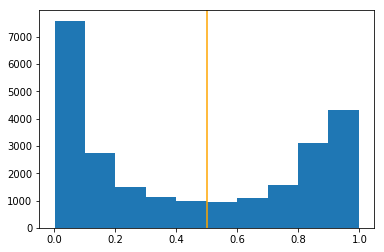

In [121]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [123]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0

In [124]:
"{:0.2f}".format(pct_auc)

'94.14'

In [125]:
float_y_hat = []
for y in y_hat:
    float_y_hat.append(y[0])

In [126]:
ydf = pd.DataFrame(list(zip(float_y_hat, y_valid)), columns=['y_hat','y'])

In [130]:
ydf.head(10)

,y_hat,y
0,0.286482,0
1,0.971229,1
2,0.305465,1
3,0.255524,0
4,0.946482,1
5,0.550246,1
6,0.553935,1
7,0.054342,0
8,0.849532,0
9,0.842808,1


In [132]:
" ".join(index_word[x] for x in all_x_valid[7])

"START the emperor's richard haydn dog is betrothed to johanna's joan fontaine dog however when virgil bing crosby arrives in town to sell a record player to the emperor his dog is attacked by johanna's dog after a revenge attack where virgil is banished from town a psychoanalyst insists that johanna's dog must confront dog so that she can overcome her doggy fears this is arranged and the dogs fall in love so do virgil and johanna the rest of the film passes by with romance and at the end johanna's dog gives birth but who is the father br br the dog story is the very weak vehicle that is used to try and create a story between humans its a terrible storyline there are 3 main musical pieces all of which are rubbish bad songs and dreadful choreography its just an extremely boring film bing has too many words in each sentence and delivers them in an almost irritating manner its not funny ever but its meant to be bing and joan have done much better than this"

In [133]:
ydf [(ydf.y == 0) & (ydf.y_hat > 0.9)].head(10)

,y_hat,y
386,0.912285,0
810,0.903162,0
1059,0.924200,0
1207,0.914045,0
1803,0.904739,0
2151,0.946111,0
2216,0.964092,0
2397,0.955129,0
2786,0.903314,0
3087,0.934419,0


In [134]:
" ".join(index_word[x] for x in all_x_valid[386])

"START wow another kevin costner hero movie postman tin cup waterworld bodyguard wyatt earp robin hood even that baseball movie seems like he makes movies specifically to be the center of attention the characters are almost always the same the heroics the flaws the greatness the fall the redemption yup within the 1st 5 minutes of the movie we're all supposed to be in awe of his character and it builds up more and more from there br br and this time the story story is just a collage of different movies you don't need a spoiler you've seen this movie several times though it had different titles you'll know what will happen way before it happens this is like mixing an officer and a gentleman with but both are easily better movies watch to see how this kind of movie should be made and also to see how an good but slightly underrated actor russell plays the hero"

In [135]:
ydf [(ydf.y == 1) & (ydf.y_hat < 0.1)].head(10)

,y_hat,y
100,0.062402,1
101,0.099594,1
224,0.082833,1
298,0.075991,1
300,0.077736,1
325,0.083993,1
345,0.090197,1
536,0.094491,1
544,0.080655,1
581,0.078299,1


In [136]:
" ".join(index_word[x] for x in all_x_valid[100])

"START a quick glance at the premise of this film would seem to indicate just another dumb '80's inbred backwood slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread mounting tension amidst a lovely scenic backdrop these feelings are further heightened by a cast of realistically likable characters and antagonists that are more amoral than cardboard definitions of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' methodology came from"